##4. MODEL

In [ ]:
y_train = X_train[['Response']]
X_train = X_train.drop('Response', axis = 1)
y_test = X_test[['Response']]
X_test = X_test.drop('Response', axis = 1)

NOTE: We have unbalanced data, but we need balanced data to avoid biasing our model and improve our performance metrics. So we'll use to Smote(Synthetic Minority Oversampling Technique).

In [ ]:
sm = SMOTE(sampling_strategy='auto', k_neighbors=8, random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)df_balanced = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)

In [ ]:
# Let's take a look at the descriptive statistics of our new data after the SMOTE technique
df_balanced.describe()

Income  Recency  NumDealsPurchases  NumWebPurchases  \
count   3052.00  3052.00            3052.00          3052.00   
mean   55169.04    42.12               2.14             4.33   
std    22216.44    27.44               1.79             2.62   
min     1730.00     0.00               0.00             0.00   
25%    36973.65    18.75               1.00             2.00   
50%    55317.14    39.00               2.00             4.00   
75%    73448.50    63.00               3.00             6.00   
max   116768.00    99.00              15.00            27.00   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
count              3052.00            3052.00            3052.00   
mean                  3.16               5.74               5.11   
std                   2.98               3.04               2.41   
min                   0.00               0.00               0.00   
25%                   1.00               3.00               3.00   
50%                   2.00               5.00               6.00   
75%                   5.00               8.00               7.00   
max                  28.00              13.00              20.00   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count       3052.00       3052.00       3052.00       3052.00       3052.00   
mean           0.07          0.06          0.12          0.08          0.01   
std            0.25          0.24          0.32          0.27          0.09   
min            0.00          0.00          0.00          0.00          0.00   
25%            0.00          0.00          0.00          0.00          0.00   
50%            0.00          0.00          0.00          0.00          0.00   
75%            0.00          0.00          0.00          0.00          0.00   
max            1.00          1.00          1.00          1.00          1.00   

       Education_Graduate  Education_Postgraduate  Education_Undergraduate  \
count             3052.00                 3052.00                  3052.00   
mean                 0.39                    0.31                     0.07   
std                  0.49                    0.46                     0.25   
min                  0.00                    0.00                     0.00   
25%                  0.00                    0.00                     0.00   
50%                  0.00                    0.00                     0.00   
75%                  1.00                    1.00                     0.00   
max                  1.00                    1.00                     1.00   

          Age    Year   Month  TotalMntSpent  FamilySize  Response  
count 3052.00 3052.00 3052.00        3052.00     3052.00   3052.00  
mean    52.82 2012.80    6.33         770.96        2.26      0.50  
std     11.36    0.69    3.25         680.24        0.95      0.50  
min     26.00 2012.00    1.00           5.00        1.00      0.00  
25%     44.00 2012.00    4.00         104.00        2.00      0.00  
50%     52.00 2013.00    6.00         603.00        2.00      0.50  
75%     62.00 2013.00    9.00        1345.25        3.00      1.00  
max     82.00 2014.00   12.00        2525.00        5.00      1.00

In [ ]:
algorithms_list = [LogisticRegression, RandomForestClassifier, xgb.XGBClassifier, KNeighborsClassifier, SVC, MLPClassifier, DecisionTreeClassifier, LGBMClassifier]

result = []
results = pd.DataFrame(columns=["Models", "Accuracy", "Precision", "Recall", "f1_score"])
models = []
for algorithm in algorithms_list:

    # modelling
    model = algorithm().fit(X_train,y_train)
    models.append(model)
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test)

    # to calculate metrics
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1_score = 2 *(precision * recall) / (precision + recall)

    result = pd.DataFrame([[model_name, accuracy*100, precision*100, recall*100, f1_score*100]], columns = ["Models", "Accuracy", "Precision", "Recall", "f1_score"])
    results = results.append(result)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-86-e27397bc1dce>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = algorithm().fit(X_train,y_tra

In [ ]:
results.sort_values('Accuracy', ascending=False)

Models  Accuracy  Precision  Recall  f1_score
0           XGBClassifier     85.43      52.63   57.97     55.17
0          LGBMClassifier     85.43      52.86   53.62     53.24
0  RandomForestClassifier     84.53      50.00   49.28     49.64
0  DecisionTreeClassifier     82.51      45.36   63.77     53.01
0      LogisticRegression     76.01      34.68   62.32     44.56
0    KNeighborsClassifier     70.63      30.63   71.01     42.79
0                     SVC     69.51      24.43   46.38     32.00
0           MLPClassifier     30.94      17.44   92.75     29.36

##5. MODEL TUNING

####LGBM TUNING

In [ ]:
lgbm = LGBMClassifier()

In [ ]:
lgbm_params = {"learning_rate":[0.001,0.01,0.1],
              "n_estimators":[200,500,100],
              "max_depth":[1,2,35,8]}

In [ ]:
lgbm_cv_model = GridSearchCV(lgbm,lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
lgbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 35, 'n_estimators': 500}

In [ ]:
# final model
lgbm_tuned = LGBMClassifier(learning_rate=0.1, max_depth=8, n_estimators=500).fit(X_train,y_train)
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8542600896860987

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       377
           1       0.53      0.55      0.54        69

    accuracy                           0.85       446
   macro avg       0.72      0.73      0.73       446
weighted avg       0.86      0.85      0.86       446



In [ ]:
lgbm_roc_auc = roc_auc_score(y_test, lgbm_tuned.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lgbm_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='AUC (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1],[0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Reciver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

####XGBOOST TUNING

In [ ]:
xgb = XGBClassifier()

In [ ]:
# Typical values selected for XGBoost
xgb_params =  {"learning_rate": [0.1,0.001,0.01],
             "n_estimators": [100,500,800,1000],
             "subsample": [0.6,0.8,1],
              "max_depth": [3,5,7]}

In [ ]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.8}

In [ ]:
xgb_tuned = XGBClassifier(learning_rate= 0.1, max_depth=7, n_estimators=500, subsample=0.8).fit(X_train,y_train)
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.8587443946188341

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       377
           1       0.54      0.59      0.57        69

    accuracy                           0.86       446
   macro avg       0.73      0.75      0.74       446
weighted avg       0.86      0.86      0.86       446



In [ ]:
xgb_roc_auc = roc_auc_score(y_test, xgb_tuned.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='AUC (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1],[0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Reciver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

####RANDOM FORESTS TUNING

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf_params = {'n_estimators': [100,200,500,1000],
            "max_features": [3,5,7,8],
            "min_samples_split": [2,5,10,20]}

In [ ]:
rf_cv_model = GridSearchCV(rf,rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
rf_cv_model.best_params_

{'max_features': 3, 'min_samples_split': 2, 'n_estimators': 200}

In [ ]:
# final model
rf_tuned = RandomForestClassifier(max_features=3, min_samples_split=2, n_estimators=200).fit(X_train,y_train)
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

<ipython-input-101-2793d0887784>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_tuned = RandomForestClassifier(max_features=3, min_samples_split=2, n_estimators=200).fit(X_train,y_train)


0.852017937219731

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       377
           1       0.52      0.49      0.51        69

    accuracy                           0.85       446
   macro avg       0.72      0.71      0.71       446
weighted avg       0.85      0.85      0.85       446



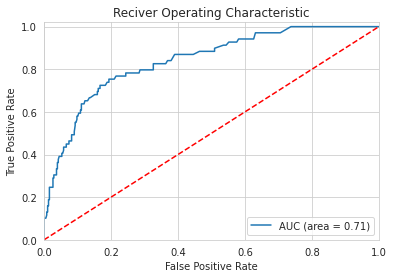

In [ ]:
rf_roc_auc = roc_auc_score(y_test, rf_tuned.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_tuned.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='AUC (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1],[0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Reciver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

#BONUS

Lastly, we can compare importance of our new features. Finally, we can look at the importance of our new features. We want to have contributed a little to our model with the features created.

In [ ]:
y_pred = rf_tuned.predict(X_test)

feature_importance = pd.Series(rf_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Feature Importance Scores')
plt.ylabel('Features')
plt.title("Feature Importance Ranking")
plt.show()

YES! Our new features are at the top of the list of importance.

#CONCLUSION

We achieve the best result with XGBoost. We don't have big data so we can use XGBoost comfortably, but if we had bigger data we would consider using LightGBM Algorithm to reduce computation time.